In [18]:
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import matplotlib as mpl

import raddetect as rd

In [19]:
from scipy.stats import crystalball
from scipy.stats import norm

In [20]:
# It works only in the MPIK network
monalpha = rd.MonalphaAnalysis(file_path='Mn14052024')

Retrieving data from https://radon-srv1.mpi-hd.mpg.de/coating_db/resultfiles/Mn14052024/mn14052024.root


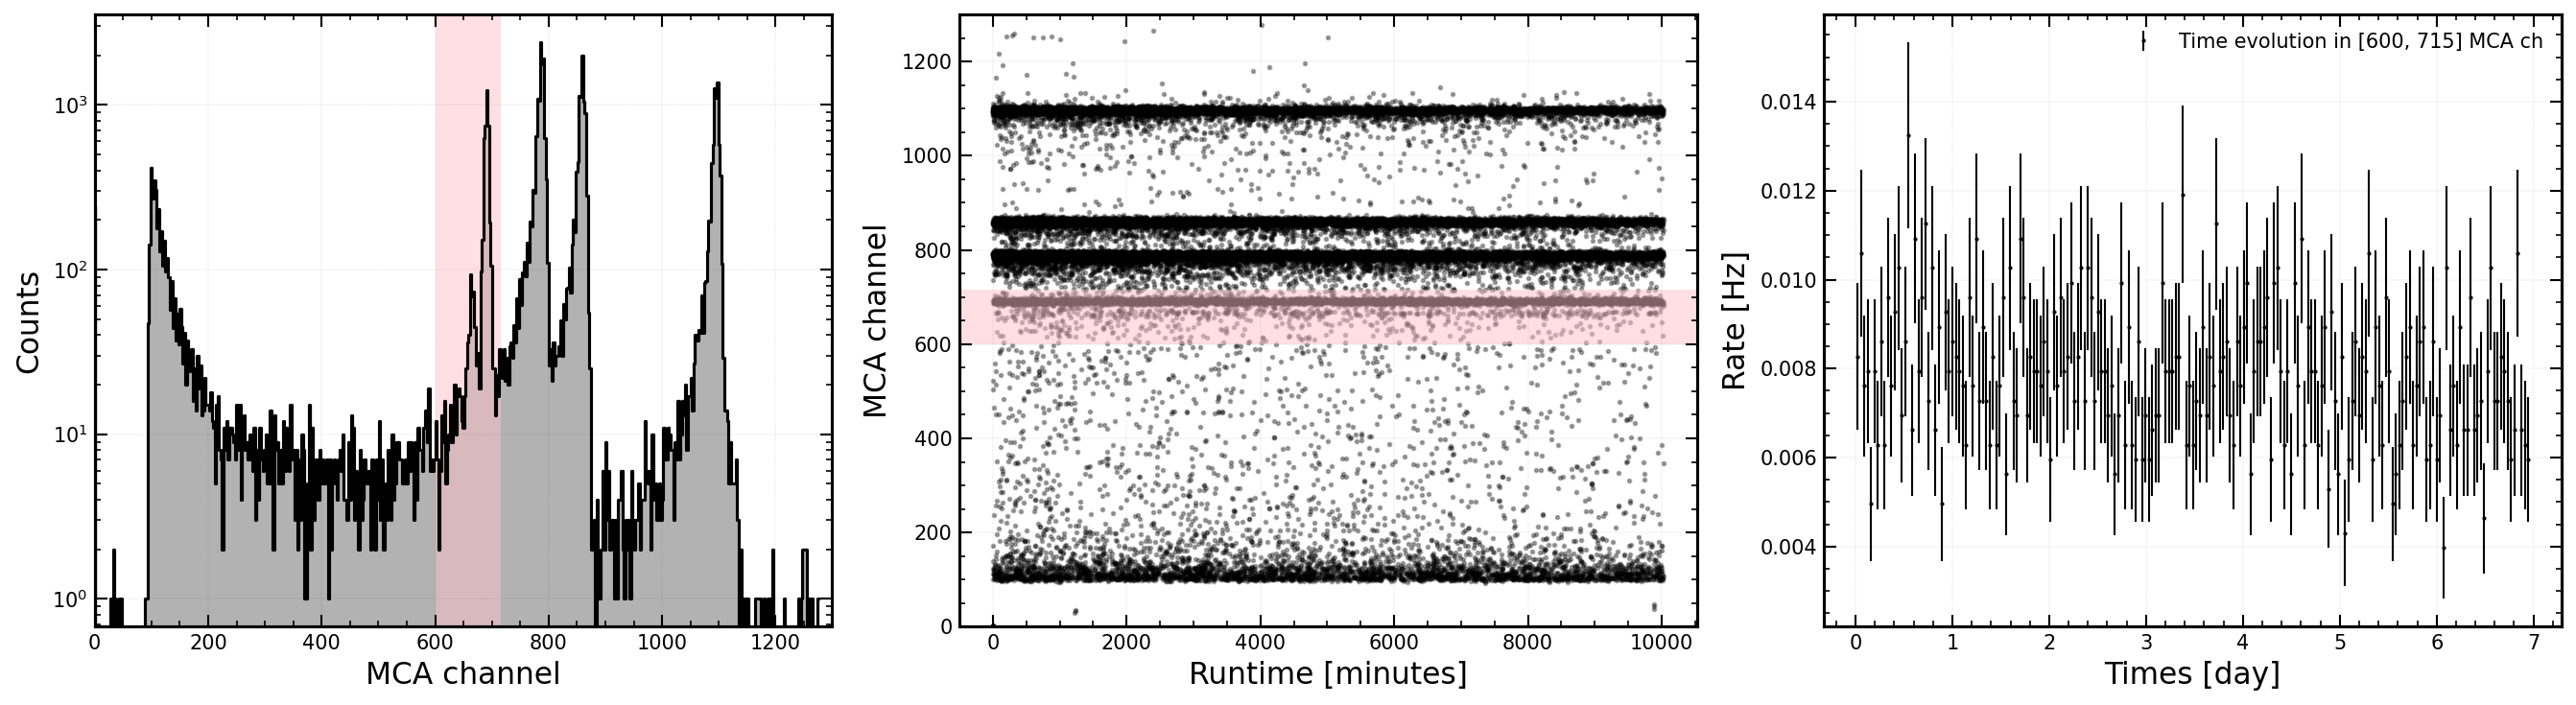

In [21]:
monalpha.get_base_plot(n_channels=500, n_timestamp=200)

In [22]:
class Model:
    def __init__(self, 
                x,
                # beta1, m1,
                loc1, scale1, A1, 
                beta2, m2, loc2, scale2, A2
                ):
        self.x = x
        #self.beta1 = beta1
        #self.m1 = m1
        self.loc1 = loc1
        self.scale1 = scale1
        self.A1 = A1
        self.beta2 = beta2
        self.m2 = m2
        self.loc2 = loc2
        self.scale2 = scale2
        self.A2 = A2
        self.compute_terms()

    def compute_terms(self):
        self.norm_1 = self.A1 * norm.pdf(self.x, loc=self.loc1, scale=self.scale1)
        # self.crystalball_1 = self.A1 * crystalball.pdf(self.x, self.beta1, self.m1, loc=self.loc1, scale=self.scale1)
        self.crystalball_2 = self.A2 * crystalball.pdf(self.x, self.beta2, self.m2, loc=self.loc2, scale=self.scale2) 

    def sum_terms(self):
        return self.norm_1 + self.crystalball_2

    @staticmethod
    def total_model(x, 
                    # beta1, m1, 
                    loc1, scale1, A1, 
                    beta2, m2, loc2, scale2, A2
                    ):
        model_instance = Model(x, 
                            # beta1, m1, 
                            loc1, scale1, A1, 
                            beta2, m2, loc2, scale2, A2
                            )
        return model_instance.sum_terms()

init = {
    # 'beta1': 1, 'm1': 2, 
    'loc1': 665, 'scale1': 3, 'A1': 100,
    'beta2': 1, 'm2': 2, 'loc2': 690, 'scale2': 3, 'A2': 3500
}

fixed = {
    # 'beta1': False, 'm1': False, 
    'loc1': False, 'scale1': False, 'A1': False, 
    'beta2': False, 'm2': False, 'loc2': False, 'scale2': False, 'A2': False,    
}

_MCA_range = [655, 710]
_MCA_counts_limit = 1
m = monalpha.get_mca_spectrum_fitting_object(model=Model, init=init, MCA_range=_MCA_range, MCA_counts_limit=_MCA_counts_limit, fixed=fixed)
m.migrad()
# m.minos()
# m.hesse()

Prefit with scipy for deriving inital values
| Parameters | Value       | Error       |
------------------------------------------
| loc1       |     665.443 |       0.505 |
| scale1     |       6.461 |       0.671 |
| A1         |     439.769 |      34.323 |
| beta2      |       1.608 |       0.313 |
| m2         |     155.301 |    4745.780 |
| loc2       |     691.524 |       0.072 |
| scale2     |       3.768 |       0.062 |
| A2         |    3984.779 |      66.762 |
------------------------------------------


/usr/lib/python3/dist-packages/scipy/stats/_continuous_distns.py:8967: RuntimeWarning: overflow encountered in power
  return ((m/beta)**m * np.exp(-beta**2 / 2.0) *
/usr/lib/python3/dist-packages/scipy/stats/_continuous_distns.py:8967: RuntimeWarning: invalid value encountered in multiply
  return ((m/beta)**m * np.exp(-beta**2 / 2.0) *


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 117.7 (χ²/ndof = 2.6)      │              Nfcn = 371              │
│ EDM = nan (Goal: 0.0002)         │            time = 0.1 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   ABOVE EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ loc1   │ 6.6544e2  │    nan    │            │            │         │         │       │
│ 1 │ scale1 │  6.4615   │    nan    │            │            │         │         │       │
│ 2 │ A1     │ 4.3977e2  │    nan    │            │            │         │         │       │
│ 3 │ beta2  │  1.6082   │    nan    │            │            │         │         │       │
│ 4 │ m2     │  1.553e2  │    nan    │            │            │         │         │       │
│ 5 │ loc2   │ 6.9152e2  │    nan    │            │            │         │         │       │
│ 6 │ scale2 │  3.7682   │    nan    │            │            │         │         │       │
│ 7 │ A2     │ 3.9848e3  │    nan    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬─────────────────────────────────────────────────────────┐
│        │   loc1 scale1     A1  beta2     m2   loc2 scale2     A2 │
├────────┼─────────────────────────────────────────────────────────┤
│   loc1 │    nan    nan    nan    nan    nan    nan    nan    nan │
│ scale1 │    nan    nan    nan    nan    nan    nan    nan    nan │
│     A1 │    nan    nan    nan    nan    nan    nan    nan    nan │
│  beta2 │    nan    nan    nan    nan    nan    nan    nan    nan │
│     m2 │    nan    nan    nan    nan    nan    nan    nan    nan │
│   loc2 │    nan    nan    nan    nan    nan    nan    nan    nan │
│ scale2 │    nan    nan    nan    nan    nan    nan    nan    nan │
│     A2 │    nan    nan    nan    nan    nan    nan    nan    nan │
└────────┴─────────────────────────────────────────────────────────┘

/tmp/ipykernel_15214/2963621798.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


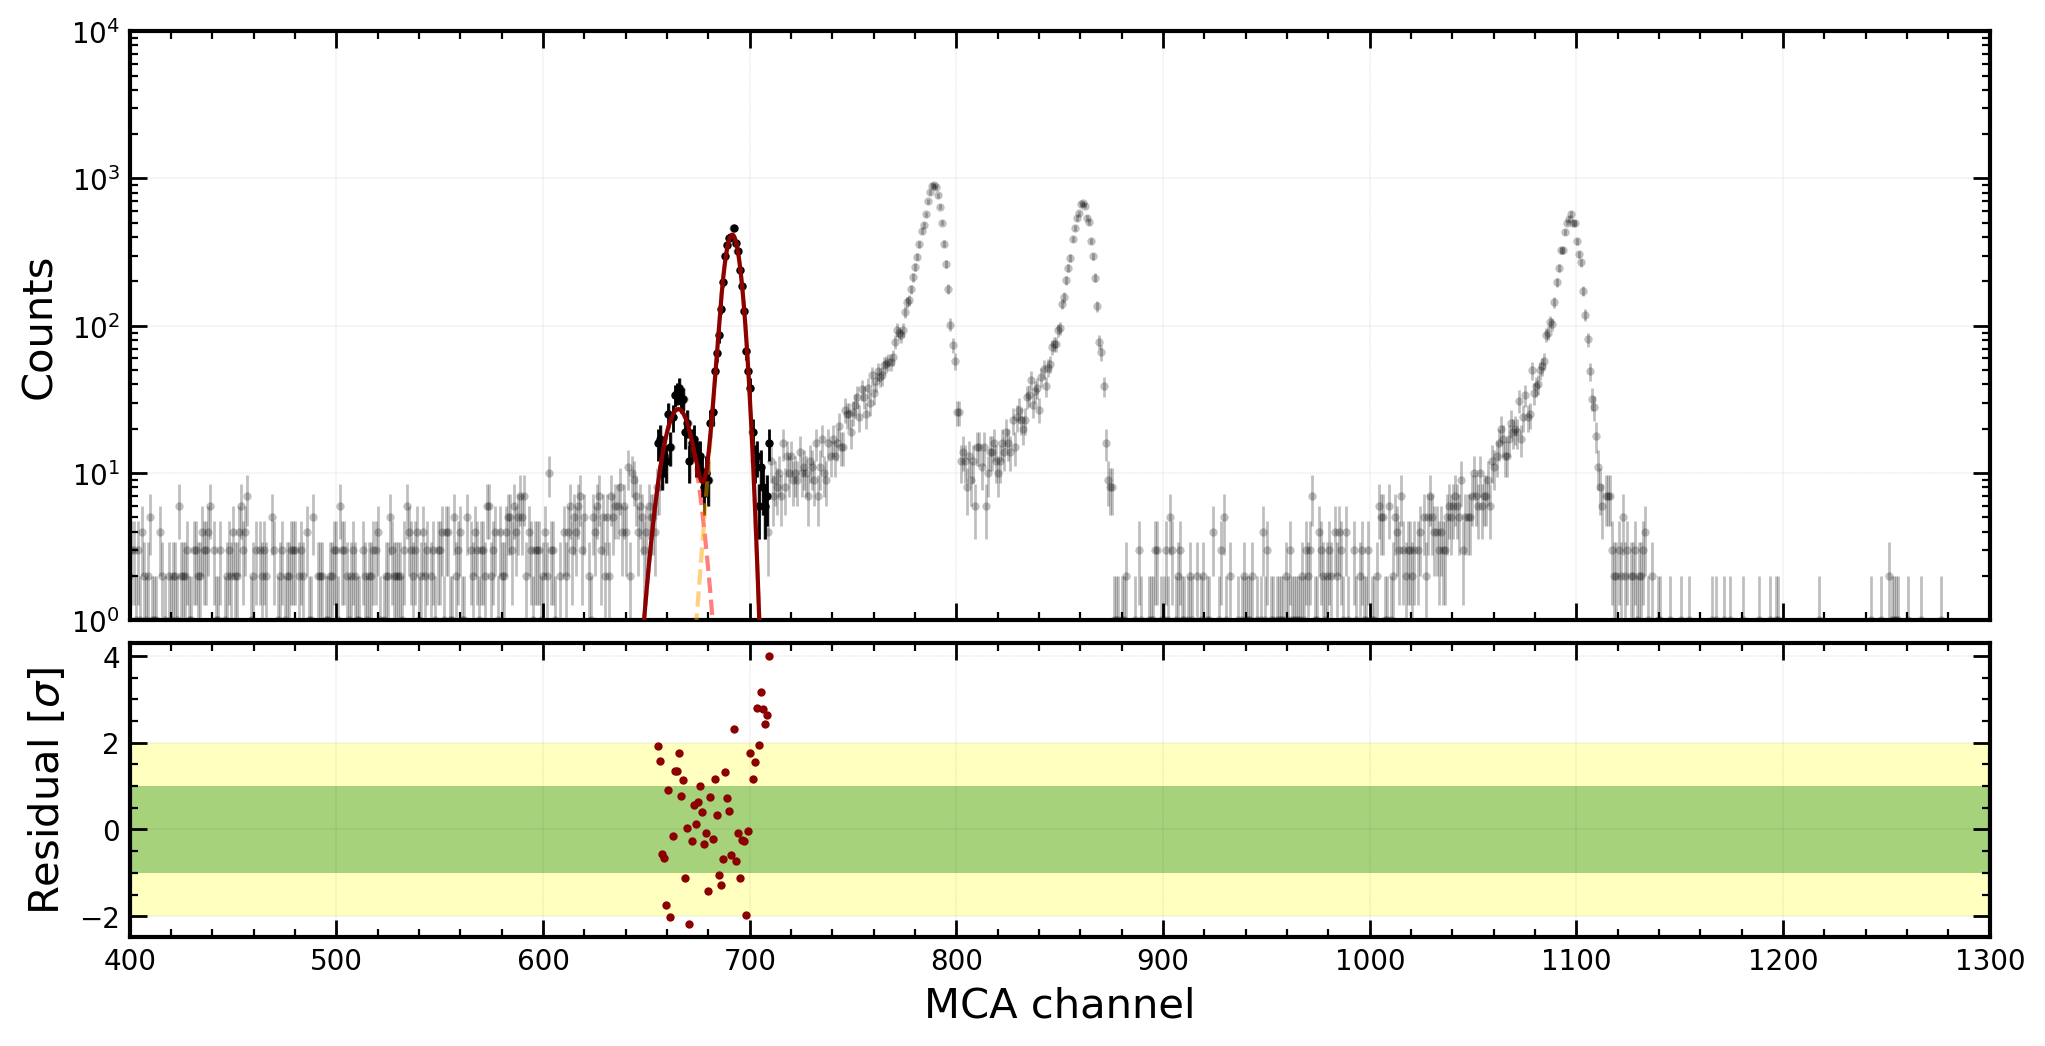

In [23]:
data, channels = monalpha.get_mca_histogram(MCA_range=[0, 1300])
_data, _channels = monalpha.get_mca_histogram(MCA_range=_MCA_range)
mask = (_data > _MCA_counts_limit)
_data = _data[mask]
_channels = _channels[mask]
_model = Model(_channels, *np.array(m.values))

x = np.arange(0, 1300, 0.1)
model = Model(x, *np.array(m.values))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6), dpi=200, sharex=True, gridspec_kw={'height_ratios':[2,1], 'hspace': 0.05})

ax1.errorbar(channels, data, yerr=np.sqrt(data), lw=0, marker='o', color='black', ms=3, elinewidth=1, alpha=0.25)
ax1.errorbar(_channels, _data, yerr=np.sqrt(_data), lw=0, marker='o', color='black', ms=3, elinewidth=1, alpha=1)

l = ax1.plot(x, model.sum_terms(), ls='-', color='darkred', zorder=5)
ax1.plot(x, model.norm_1, ls='--', lw=1.5, color='red', alpha=0.5, zorder=3)
ax1.plot(x, model.crystalball_2, ls='--', lw=1.5, color='orange', alpha=0.5, zorder=3)

ax2.plot(_channels, (_data - _model.sum_terms()) / np.sqrt(_data), lw=0, marker='.', color=l[0].get_color())

ax2.axhspan(-2, 2, color='yellow', lw=0, alpha=0.25)
ax2.axhspan(-1, 1, color='green', lw=0, alpha=0.35)

ax1.set_yscale('log')
ax1.set_ylim(1e0, 1e4)
ax1.set_xlim(400, 1300)

ax1.grid()

# ax2.set_ylim(-5, 50)
ax2.grid()

ax2.set_xlabel('MCA channel')
ax1.set_ylabel('Counts')
ax2.set_ylabel('Residual [$\sigma$]')
        
plt.tight_layout()
plt.show()

# Activity estimation

In [24]:
tot_counts = np.sum(_data) * np.diff(_channels)[0]
tot_counts_err = np.sqrt(np.sum(_data) * np.diff(_channels)[0])
livetime = ( max(monalpha.timestamp) - min(monalpha.timestamp) ) # this is not corrected for the deadtime
measured_activity = tot_counts / livetime
measured_activity_err = tot_counts_err / livetime

print(f'Activity given data in {_MCA_range}: {measured_activity:.4f} +/- {measured_activity_err:.4f} Hz')

Activity given data in [655, 710]: 0.0075 +/- 0.0001 Hz


In [26]:
# see here for all the geometrical efficiencies: https://docs.google.com/spreadsheets/d/1N4GCnCQyMScjAJV0-CRPdfsBdWHai_owmR4s_UxL4Is/edit?gid=0#gid=0
# carefull that they might be outdated !!
eff = 2.93/2/100
eff_err = 0.02/2/100

true_activity = measured_activity / eff
true_activity_err = np.sqrt( (measured_activity_err/measured_activity)**2 + eff_err**2  ) 

print(f'Corrected activity: {true_activity:.3f} +/- {true_activity_err:.3f} Bq')

Corrected activity: 0.513 +/- 0.015 Bq
